This notebook includes:

- Checking/Visualizing each of the different imaging modalities available in TCIA and IDC

In [1]:
# Import libraries
from tcia_utils import nbia
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
import random
import pydicom
import sys
import os

# os.chdir(os.getcwd())

In [2]:
# See what data fields are availale
help(nbia.getSeries)

Help on function getSeries in module tcia_utils.nbia:

getSeries(collection='', patientId='', studyUid='', seriesUid='', modality='', bodyPart='', manufacturer='', manufacturerModel='', api_url='', format='')
    Gets Series (scan) metadata from a specified api_url.
    Allows filtering by collection, patient ID, study UID,
    series UID, modality, body part, manufacturer & model.



In [ ]:
# Get all the metadata available in TCIA to a python dataframe
# THIS MIGHT TAKE ~5 minutes to run
# DO NOT specify any data fields if you want to get AAAALLL the available data
df = nbia.getSeries(
                    # collection='',
                    # patientId='', 
                    # studyUid='', 
                    # seriesUid='', 
                    # modality='', 
                    # bodyPart='', 
                    # manufacturer='', 
                    # manufacturerModel='', 
                    # api_url='', 
                    format='df'
                    )

# save the dataframe so that you won't need to run this again
df.to_pickle("data_catalogue_tcia_api.pkl")

In [3]:
# load python data dictionary
df_api = pd.read_pickle("data_catalogue_tcia_api.pkl")

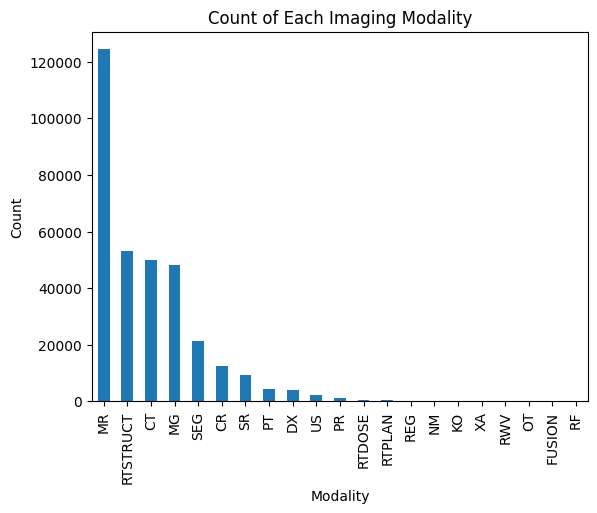

    Modality   Count
0         MR  124392
1   RTSTRUCT   53299
2         CT   49863
3         MG   48251
4        SEG   21269
5         CR   12542
6         SR    9473
7         PT    4309
8         DX    3836
9         US    2362
10        PR    1086
11    RTDOSE     524
12    RTPLAN     484
13       REG      97
14        NM      95
15        KO      40
16        XA      34
17       RWV      20
18        OT      18
19    FUSION      18
20        RF      12


In [4]:
# See what imaging modalities are available and how much
modality_counts = df_api['Modality'].value_counts().reset_index()
df_api['Modality'].value_counts().plot(kind='bar', title='Count of Each Imaging Modality')
plt.xlabel('Modality'); plt.ylabel('Count'); plt.show()
modality_counts.columns = ['Modality', 'Count']
print(modality_counts)

In [5]:
len(df_api['PatientID'].unique())

39676

2025-11-26 14:24:00,666:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1620.1225.162193220643802632340896462696'}


Number of MR series: 124392


2025-11-26 14:24:02,461:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.1620.1225.563360413706971682190920545352 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.1620.1225.162193220643802632340896462696


Number of SOP instances in this series: 192
Displaying SOP instances: 96


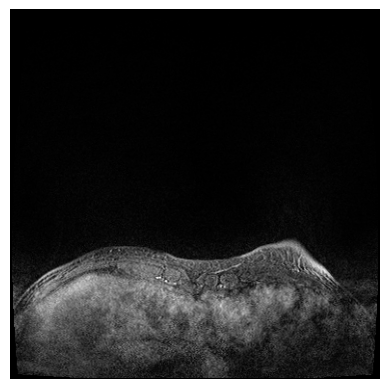

In [6]:
# Configuration
MODALITY = "MR"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

print(f"Displaying SOP instances: {sop_idx}")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

2025-11-26 14:24:02,599:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.6655.2359.156412916359027578749510788313'}


Number of CT series: 49863


2025-11-26 14:24:03,728:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.6655.2359.245878505234182196153387723685 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.6655.2359.156412916359027578749510788313


Number of SOP instances in this series: 248
Displaying SOP instances: 124


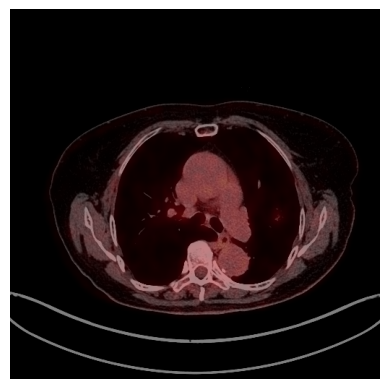

In [7]:
# Configuration
MODALITY = "CT"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

print(f"Displaying SOP instances: {sop_idx}")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

2025-11-26 14:24:03,804:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.9328.50.17.221088228918485783634000131372674907964'}


Number of PT series: 4309


2025-11-26 14:24:04,987:WARNING:Image 1.3.6.1.4.1.9328.50.17.222386417679495888671898715515600387378 already downloaded to:
tciaDownload\1.3.6.1.4.1.9328.50.17.221088228918485783634000131372674907964


Number of SOP instances in this series: 223
Displaying SOP instances: 111


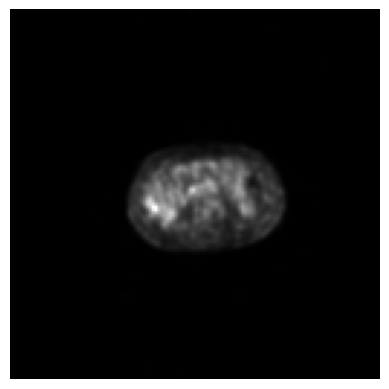

In [8]:
# Configuration
MODALITY = "PT"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

print(f"Displaying SOP instances: {sop_idx}")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

2025-11-26 14:24:05,045:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.8700.9920.111269137376258264275666337027'}


Number of US series: 2362


2025-11-26 14:24:06,036:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.8700.9920.135050136280986078241376755467 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.8700.9920.111269137376258264275666337027


Number of SOP instances in this series: 1
Displaying SLice number: 140


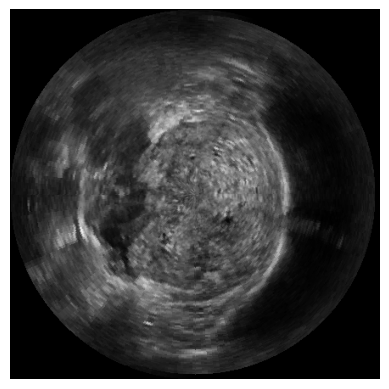

In [9]:
MODALITY = "US"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

axis = 0
slice_num = int(image.shape[axis]/2)
slice = None
slice = image[slice_num, :, :] if axis==0 else slice
slice = image[:, slice_num, :] if axis==1 else slice
slice = image[:, :, slice_num] if axis==2 else slice

print(f"Displaying SLice number: {slice_num}")

plt.imshow(slice, cmap="gray")
plt.axis("off")
plt.show()

2025-11-26 14:24:06,145:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.1620.1225.189309616583593841568898437591'}


Number of MG series: 48251


2025-11-26 14:24:07,109:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.1620.1225.432204750009982939122881453356 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.1620.1225.189309616583593841568898437591


Number of SOP instances in this series: 9
Displaying SOP instances: 4


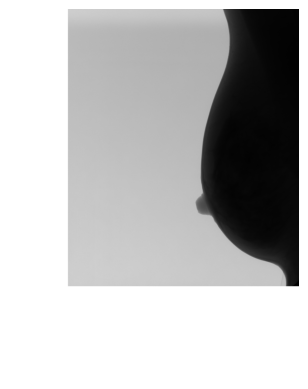

In [10]:
# Configuration
MODALITY = "MG"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

print(f"Displaying SOP instances: {sop_idx}")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

2025-11-26 14:24:07,804:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.113229090558222071751101287823848871871'}


Number of SEG series: 21269


2025-11-26 14:24:08,727:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.86800752571640232901063498827833277464 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.113229090558222071751101287823848871871


Number of SOP instances in this series: 1
Displaying SLice number: 32


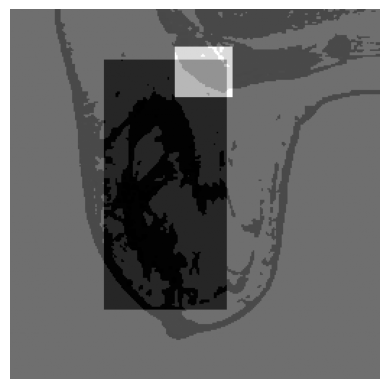

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 8., ..., 0., 0., 0.],
        [0., 0., 8., ..., 0., 0., 0.],
        [0., 0., 9., ..., 0., 0., 0.]], shape=(256, 10)),
 array([  0. ,  11.3,  22.6,  33.9,  45.2,  56.5,  67.8,  79.1,  90.4,
        101.7, 113. ]),
 <a list of 256 BarContainer objects>)

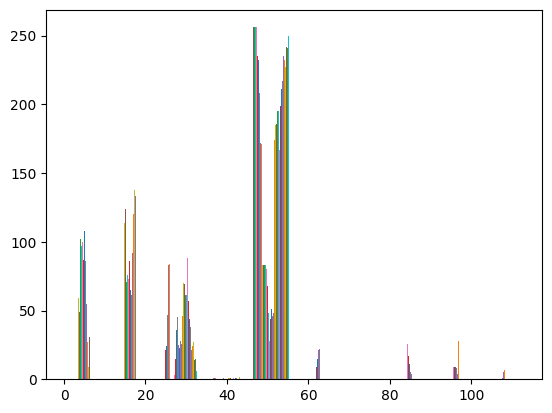

In [11]:
MODALITY = "SEG"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

axis = 0
slice_num = int(image.shape[axis]/2)
slice = None
slice = image[slice_num, :, :] if axis==0 else slice
slice = image[:, slice_num, :] if axis==1 else slice
slice = image[:, :, slice_num] if axis==2 else slice

print(f"Displaying SLice number: {slice_num}")

plt.imshow(slice, cmap="gray")
plt.axis("off")
plt.show()

plt.hist(slice)

2025-11-26 14:24:10,696:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.2.826.0.1.534147.667.2747872357.2023635394045.4'}


Number of RTSTRUCT series: 53299


2025-11-26 14:24:11,679:WARNING:Image 1.2.826.0.1.534147.667.2747872357.2023635394045 already downloaded to:
tciaDownload\1.2.826.0.1.534147.667.2747872357.2023635394045.4


Number of SOP instances in this series: 1


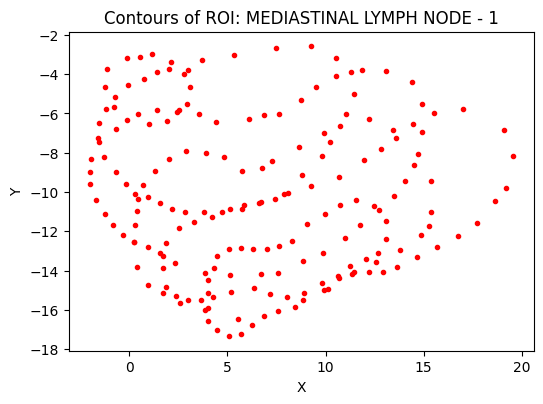

In [12]:
from matplotlib.patches import Polygon

MODALITY = "RTSTRUCT"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)

# Pick the first ROI
roi_index = 0
roi_contour_sequence = ds.ROIContourSequence[roi_index].ContourSequence

plt.figure(figsize=(6,6))

for contour in roi_contour_sequence:
    coords = contour.ContourData
    # Convert flat list to (x, y) tuples
    x = coords[0::3]  # every 3rd starting at 0
    y = coords[1::3]  # every 3rd starting at 1
    plt.plot(x, y, 'r.')  # red line connecting points

plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Contours of ROI: {ds.StructureSetROISequence[roi_index].ROIName}")
plt.show()

2025-11-26 14:24:11,805:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.99.1071.23959582523877024835897531510486'}


Number of CR series: 12542


2025-11-26 14:24:12,845:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.99.1071.31203474786625370784733943893915 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.99.1071.23959582523877024835897531510486


Number of SOP instances in this series: 1
Displaying SOP instances: 0


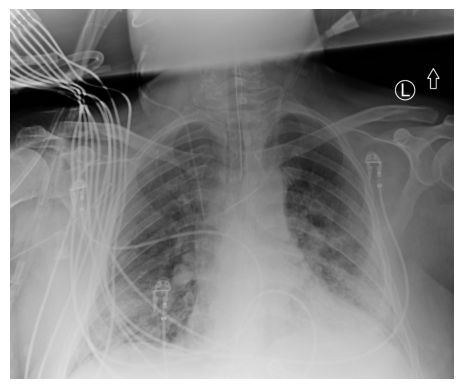

In [13]:
# Configuration
MODALITY = "CR"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

print(f"Displaying SOP instances: {sop_idx}")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [14]:
import json

# Configuration
MODALITY = "SR"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
print(ds)


2025-11-26 14:24:13,612:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.2.276.0.7230010.3.1.3.0.23855.1553307010.141449'}


Number of SR series: 9473


2025-11-26 14:24:14,628:WARNING:Image 1.2.276.0.7230010.3.1.4.0.23855.1553307010.141447 already downloaded to:
tciaDownload\1.2.276.0.7230010.3.1.3.0.23855.1553307010.141449


Number of SOP instances in this series: 1
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Enhanced SR Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.23855.1553307010.141447
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0012) Instance Creation Date              DA: '20190322'
(0008,0013) Instance Creation Time              TM: '221010'
(0008,0014) Instance Creator UID                UI: 1.2.276.0.7230010.3.0.3.6.3
(0008,0016) SOP Class UID                       UI: Enhanced SR Storage
(0008,0018) SOP 

2025-11-26 14:24:15,095:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.2.826.0.1.3680043.10.474.419639.127830151667167686853943944646'}


Number of DX series: 3836


2025-11-26 14:24:16,095:WARNING:Image 1.2.826.0.1.3680043.10.474.419639.100046936122267937380782102397 already downloaded to:
tciaDownload\1.2.826.0.1.3680043.10.474.419639.127830151667167686853943944646


Number of SOP instances in this series: 1
Displaying SOP instances: 0


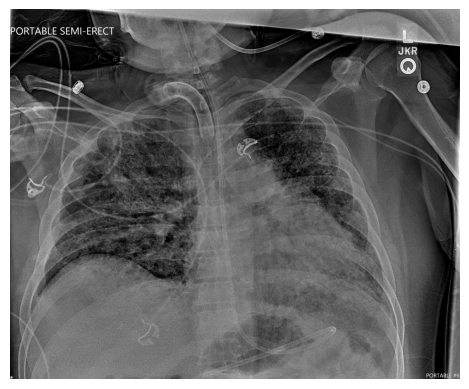

In [15]:
# Configuration
MODALITY = "DX"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

print(f"Displaying SOP instances: {sop_idx}")

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

2025-11-26 14:24:17,315:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.18928437182959181515193134917397168291'}


Number of RTDOSE series: 524


2025-11-26 14:24:18,216:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.257239674186712872693420764136900776604 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.18928437182959181515193134917397168291


Number of SOP instances in this series: 1
Displaying SLice number: 77


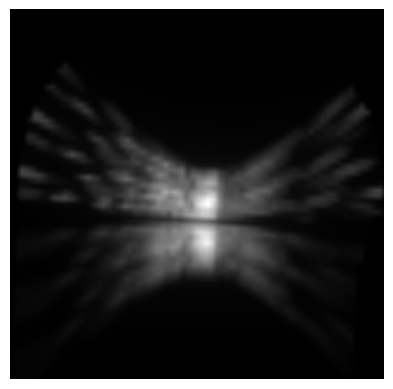

In [16]:
MODALITY = "RTDOSE"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=19)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

axis = 2
slice_num = int(image.shape[axis]/2)
slice = None
slice = image[slice_num, :, :] if axis==0 else slice
slice = image[:, slice_num, :] if axis==1 else slice
slice = image[:, :, slice_num] if axis==2 else slice

print(f"Displaying SLice number: {slice_num}")

plt.imshow(slice, cmap="gray")
plt.axis("off")
plt.show()

In [17]:
MODALITY = "RTPLAN"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=19)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
for elem in ds:
    print(elem)

2025-11-26 14:24:18,295:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.326085875943502212527926287996663121071'}


Number of RTPLAN series: 484


2025-11-26 14:24:19,211:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.202308303987230903734772976103154420927 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.326085875943502212527926287996663121071


Number of SOP instances in this series: 1
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0012) Instance Creation Date              DA: '20000426'
(0008,0013) Instance Creation Time              TM: '134302'
(0008,0016) SOP Class UID                       UI: RT Plan Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.202308303987230903734772976103154420927
(0008,0020) Study Date                          DA: '19981018'
(0008,0030) Study Time                          TM: '084356.750000'
(0008,0050) Accession Number                    SH: ''
(0008,0060) Modality                            CS: 'RTPLAN'
(0008,0070) Manufacturer                        LO: 'Elekta'
(0008,0090) Referring Physician's Name          PN: ''
(0008,1030) Study Description                   LO: 'Avanto RoutineImage Guidance'
(0008,1070) Operators' Name                     PN: ''
(0008,1080) Admitting Diagnoses Description     LO: 'Vestibular schwannoma'
(0008,10

In [18]:
MODALITY = "REG"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
for elem in ds:
    print(elem)

2025-11-26 14:24:19,245:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.185003304329547871080253555045115534602'}


Number of REG series: 97


2025-11-26 14:24:20,218:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.28235546928594586220010182778029671516 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.185003304329547871080253555045115534602


Number of SOP instances in this series: 1
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0012) Instance Creation Date              DA: '20120902'
(0008,0013) Instance Creation Time              TM: '152104.909'
(0008,0016) SOP Class UID                       UI: Spatial Registration Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.28235546928594586220010182778029671516
(0008,0020) Study Date                          DA: '20050330'
(0008,0021) Series Date                         DA: '20120902'
(0008,0022) Acquisition Date                    DA: '20120902'
(0008,0023) Content Date                        DA: '20120902'
(0008,0030) Study Time                          TM: '112729'
(0008,0031) Series Time                         TM: '152104.909'
(0008,0033) Content Time                        TM: '152104.909'
(0008,0050) Accession Number                    SH: ''
(0008,0060) Modality                            CS: 'REG'
(0008,0070) M

2025-11-26 14:24:20,263:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.74397173166694942283700704964616108854'}


Number of NM series: 95


2025-11-26 14:24:21,178:WARNING:Image 1.3.6.1.4.1.14519.5.2.1.163549733154615054390236280482097578526 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.74397173166694942283700704964616108854


Number of SOP instances in this series: 1
Displaying SOP instances: 0


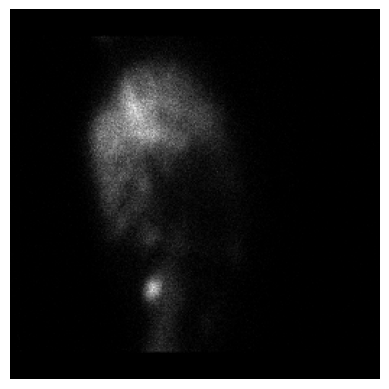

In [19]:
# Configuration
MODALITY = "NM"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=100)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
image = ds.pixel_array

print(f"Displaying SOP instances: {sop_idx}")

plt.imshow(image[1], cmap="gray")
plt.axis("off")
plt.show()

In [21]:
# Configuration
MODALITY = "KO"  # Choose modality
DOWNLOAD_DIR = "tciaDownload"

# Filter DataFrame for the chosen modality
df_modality = df_api[df_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=100)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]

# Get all SOP Instance UIDs for the sampled series
sop_uids = nbia.getSopInstanceUids(series_uid)
print(f"Number of SOP instances in this series: {len(sop_uids)}")

# Select the middle SOP instance and download
sop_idx = len(sop_uids) // 2
sop_uid = sop_uids[sop_idx]["SOPInstanceUID"]
nbia.downloadImage(series_uid, sop_uid)

# Load the DICOM file and display the image
dcm_file = f"{DOWNLOAD_DIR}/{series_uid}/{sop_uid}.dcm"
ds = pydicom.dcmread(dcm_file)
for elem in ds:
    print(elem)

2025-11-26 14:24:46,389:INFO:Calling getSOPInstanceUIDs with parameters {'SeriesInstanceUID': '1.3.6.1.4.1.14519.5.2.1.2103.7010.634114.1.1'}


Number of KO series: 40


2025-11-26 14:24:47,362:WARNING:Image 2.25.207436389892843858501075714020852154482 already downloaded to:
tciaDownload\1.3.6.1.4.1.14519.5.2.1.2103.7010.634114.1.1


Number of SOP instances in this series: 1
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Key Object Selection Document Storage
(0008,0018) SOP Instance UID                    UI: 2.25.207436389892843858501075714020852154482
(0008,0020) Study Date                          DA: '19970727'
(0008,0023) Content Date                        DA: '20140723'
(0008,0030) Study Time                          TM: '134543.250000'
(0008,0033) Content Time                        TM: '201257.491'
(0008,0050) Accession Number                    SH: ''
(0008,0060) Modality                            CS: 'KO'
(0008,0090) Referring Physician's Name          PN: ''
(0008,103E) Series Description                  LO: 'Matlab Visit 1'
(0008,1111) Referenced Performed Procedure Step SQ: <Sequence, length 0>
(0010,0010) Patient's Name                      PN: 'QIN-Breast-DCE-MRI-BC10'
(0010,0020) Patient ID                          LO: 'QIN-Bre

In [22]:
# load python data dictionary
df_idc_api = pd.read_pickle("data_catalogue_idc_api.pkl")
df_idc_api = df_idc_api.rename(columns={'collection_id': 'Collection'})

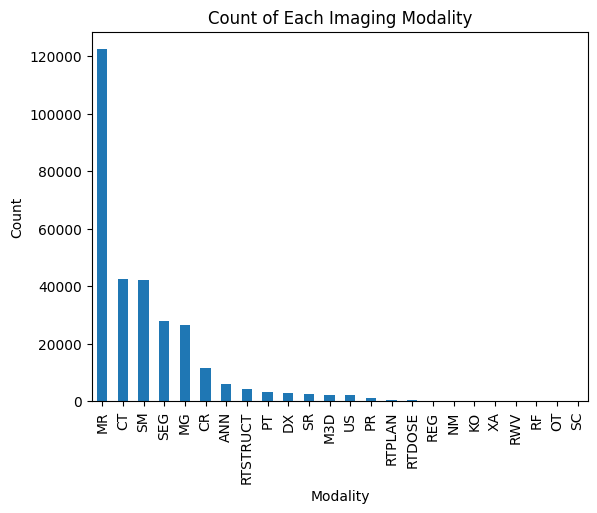

    Modality   Count
0         MR  122388
1         CT   42374
2         SM   42132
3        SEG   28067
4         MG   26413
5         CR   11655
6        ANN    6075
7   RTSTRUCT    4303
8         PT    3287
9         DX    2954
10        SR    2504
11       M3D    2328
12        US    2263
13        PR    1192
14    RTPLAN     484
15    RTDOSE     484
16       REG      97
17        NM      95
18        KO      40
19        XA      28
20       RWV      20
21        RF      12
22        OT      10
23        SC       7


In [24]:
# See what imaging modalities are available and how much
modality_counts = df_idc_api['Modality'].value_counts().reset_index()
df_idc_api['Modality'].value_counts().plot(kind='bar', title='Count of Each Imaging Modality')
plt.xlabel('Modality'); plt.ylabel('Count'); plt.show()
modality_counts.columns = ['Modality', 'Count']
print(modality_counts)

Number of SM series: 42132
Displaying SLice number: 1


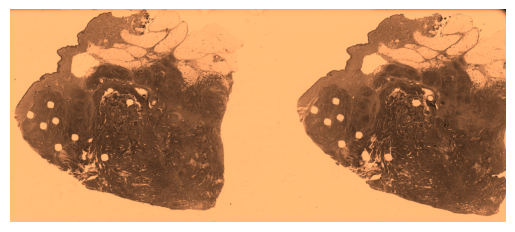

In [41]:
from idc_index import IDCClient
client = IDCClient()

# Configuration
MODALITY = "SM"  # Choose modality
DOWNLOAD_DIR = "idcDownload"

# Filter DataFrame for the chosen modality
df_modality = df_idc_api[df_idc_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]


from pydicom import dcmread
from pydicom.datadict import keyword_dict
from google.cloud import storage
from idc_index import IDCClient


# Create IDCClient for looking up bucket URLs
idc_client = IDCClient()

# Create a client and bucket object representing the IDC public data bucket
gcs_client = storage.Client.create_anonymous_client()

# This example uses a CT series in the IDC.
# get the list of file URLs in Google bucket from the SeriesInstanceUID
file_urls = idc_client.get_series_file_URLs(
    seriesInstanceUID=series_uid,
    source_bucket_location="gcs",
)

# URLs will look like this:
# s3://idc-open-data/668029cf-41bf-4644-b68a-46b8fa99c3bc/f4fe9671-0a99-4b6d-9641-d441f13620d4.dcm
(_, _, bucket_name, folder_name, file_name) = file_urls[0].split("/")
blob_key = f"{folder_name}/{file_name}"

# These objects represent the bucket and a single image blob within the bucket
bucket = gcs_client.bucket(bucket_name)
blob = bucket.blob(blob_key)

# Read the whole file directly from the blob
with blob.open("rb") as reader:
    ds = dcmread(reader)
    image = ds.pixel_array

    axis = 2
    slice_num = int(image.shape[axis]/2)
    slice = None
    slice = image[slice_num, :, :] if axis==0 else slice
    slice = image[:, slice_num, :] if axis==1 else slice
    slice = image[:, :, slice_num] if axis==2 else slice

    print(f"Displaying SLice number: {slice_num}")

    plt.imshow(slice, cmap="copper")
    plt.axis("off")
    plt.show()


In [49]:
# Configuration
MODALITY = "ANN"  # Choose modality
DOWNLOAD_DIR = "idcDownload"

# Filter DataFrame for the chosen modality
df_modality = df_idc_api[df_idc_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]


from pydicom import dcmread
from pydicom.datadict import keyword_dict
from google.cloud import storage
from idc_index import IDCClient


# Create IDCClient for looking up bucket URLs
idc_client = IDCClient()

# Create a client and bucket object representing the IDC public data bucket
gcs_client = storage.Client.create_anonymous_client()

# This example uses a CT series in the IDC.
# get the list of file URLs in Google bucket from the SeriesInstanceUID
file_urls = idc_client.get_series_file_URLs(
    seriesInstanceUID=series_uid,
    source_bucket_location="gcs",
)

# URLs will look like this:
# s3://idc-open-data/668029cf-41bf-4644-b68a-46b8fa99c3bc/f4fe9671-0a99-4b6d-9641-d441f13620d4.dcm
(_, _, bucket_name, folder_name, file_name) = file_urls[0].split("/")
blob_key = f"{folder_name}/{file_name}"

# These objects represent the bucket and a single image blob within the bucket
bucket = gcs_client.bucket(bucket_name)
blob = bucket.blob(blob_key)

# Read the whole file directly from the blob
with blob.open("rb") as reader:
    ds = dcmread(reader)
    for elem in ds:
        print(elem)

Number of ANN series: 6075
(0008,0016) SOP Class UID                       UI: Microscopy Bulk Simple Annotations Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10.511.3.10210116795960231483708408860968256
(0008,0020) Study Date                          DA: '20110404'
(0008,0023) Content Date                        DA: '20240523'
(0008,0030) Study Time                          TM: '092617'
(0008,0033) Content Time                        TM: '111612.180283'
(0008,0050) Accession Number                    SH: 'TCGA-E9-A1NE'
(0008,0060) Modality                            CS: 'ANN'
(0008,0070) Manufacturer                        LO: 'Stony Brook University'
(0008,0090) Referring Physician's Name          PN: '^^^^'
(0008,1030) Study Description                   LO: 'Histopathology'
(0008,1090) Manufacturer's Model Name           LO: 'Pan-Cancer-Nuclei-Seg'
(0008,1115) Referenced Series Sequence          SQ: <Sequence, length 1>
(0008,1140) Referenced Imag

In [56]:
from idc_index import IDCClient
client = IDCClient()

# Configuration
MODALITY = "M3D"  # Choose modality
DOWNLOAD_DIR = "idcDownload"

# Filter DataFrame for the chosen modality
df_modality = df_idc_api[df_idc_api["Modality"] == MODALITY]
print(f"Number of {MODALITY} series: {len(df_modality)}")

# Sample one series randomly (reproducible)
sample_series = df_modality.sample(n=1, random_state=42)
series_uid = sample_series["SeriesInstanceUID"].iloc[0]


from pydicom import dcmread
from pydicom.datadict import keyword_dict
from google.cloud import storage
from idc_index import IDCClient


# Create IDCClient for looking up bucket URLs
idc_client = IDCClient()

# Create a client and bucket object representing the IDC public data bucket
gcs_client = storage.Client.create_anonymous_client()

# This example uses a CT series in the IDC.
# get the list of file URLs in Google bucket from the SeriesInstanceUID
file_urls = idc_client.get_series_file_URLs(
    seriesInstanceUID=series_uid,
    source_bucket_location="gcs",
)

# URLs will look like this:
# s3://idc-open-data/668029cf-41bf-4644-b68a-46b8fa99c3bc/f4fe9671-0a99-4b6d-9641-d441f13620d4.dcm
(_, _, bucket_name, folder_name, file_name) = file_urls[0].split("/")
blob_key = f"{folder_name}/{file_name}"

# These objects represent the bucket and a single image blob within the bucket
bucket = gcs_client.bucket(bucket_name)
blob = bucket.blob(blob_key)

# Read the whole file directly from the blob
with blob.open("rb") as reader:
    ds = dcmread(reader)
    for elem in ds:
        print(elem)

Number of M3D series: 2328
(0008,0012) Instance Creation Date              DA: '20230908'
(0008,0013) Instance Creation Time              TM: '190449.040'
(0008,0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.99.3
(0008,0016) SOP Class UID                       UI: Encapsulated STL Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.5962.99.1.1982741482.1675680732.1694199888874.2.0
(0008,0020) Study Date                          DA: '20060403'
(0008,0021) Series Date                         DA: '20230908'
(0008,0023) Content Date                        DA: '20230908'
(0008,002A) Acquisition DateTime                DT: ''
(0008,0030) Study Time                          TM: '161332.339000'
(0008,0031) Series Time                         TM: '190449.040'
(0008,0033) Content Time                        TM: '190449.040'
(0008,0050) Accession Number                    SH: ''
(0008,0060) Modality                            CS: 'M3D'
(0008,0070) Manufacturer 

# Obtaining a list of unique patient IDs for the selected imaging modalities

In [ ]:
# Now let's see how many unique patient are there and 
# save a list of unique patient IDs which can be use to filter the Genomic Data Commons (GDC) data
df_filtered = df_api[df_api["Modality"].isin(["MR", "CT", "PT", "US", "DX", "MG", "CR"])]
print(len(df_filtered['PatientID'].unique())) 
print(df_filtered['PatientID'].unique())

df = pd.DataFrame(df_filtered['PatientID'].unique())
df.to_excel('patientIDs_tcia_api.xlsx', index=False, header=False)